## Fashion MNIST using a ConvNet

1. To get a high level overview about ConvNets read [this](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)
2. To understand ConvNet Arithmetic using Images see [this](https://github.com/vdumoulin/conv_arithmetic)
3. To learn more about ConvNet Strides read [Medium Blog](https://medium.com/machine-learning-algorithms/what-is-stride-in-convolutional-neural-network-e3b4ae9baedb) or [Stackoverflow Post](https://stats.stackexchange.com/questions/360899/difference-between-strided-and-non-strided-convolution)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from random import randint

## Load the Fashion MNIST dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Use np.copy to preserve the original data. This will be used for plotting graphs throughout the notebook
training_images_vcopy = np.copy(training_images)
training_labels_vcopy = np.copy(training_labels)
test_images_vcopy = np.copy(test_images)
test_labels_vcopy = np.copy(test_labels)

## Visualize the training data

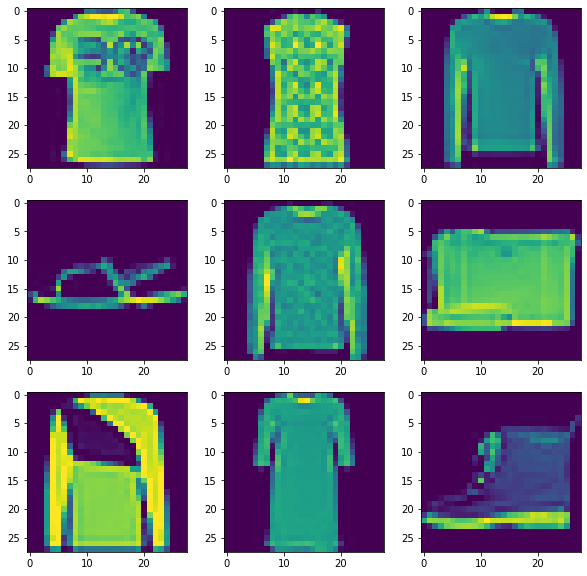

In [3]:
figure, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))

for row in axes:
    for column in row:
        # Use randint to generate random integers between [0, training_images_vcopy.shape[0]]
        column.imshow(training_images_vcopy[randint(0, training_images_vcopy.shape[0])])

plt.show()

## Exploratory Analysis

Image Labels with their English Description

0: T-shirt/top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle boot

In [4]:
uniques, counts = np.unique(training_labels, return_counts=True)

for unique, count in zip(uniques, counts): 
    print ("Label {} and Count {}".format(unique, count))

Label 0 and Count 6000
Label 1 and Count 6000
Label 2 and Count 6000
Label 3 and Count 6000
Label 4 and Count 6000
Label 5 and Count 6000
Label 6 and Count 6000
Label 7 and Count 6000
Label 8 and Count 6000
Label 9 and Count 6000


## Prepare the dataset

1. Reshape the data to indicate the number of color channels
2. Normalize the data

In [5]:
# The 1 here indicates that we have just 1 color channel. If the image data was available in RGB this would be 3
training_images = training_images.reshape(training_images.shape[0], training_images.shape[1],
                                          training_images.shape[2], 1)
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)

# Normalize the data to have 0 mean and unit variance
training_images = training_images / 255.0
test_images = test_images / 255.0

## Build a Convolutional Neural Network

In [6]:
model = tf.keras.models.Sequential()

# Create a Convolutional layer that accepts image data in matrix form.
# This layer learns 64 filters each of size kernel_size. (In this case 3 x 3)
# The filters are used to transform the input image. (Like enhance image edges and relevant features)
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu,
                                 input_shape=(28, 28, 1)))

# Create a MaxPool layer that looks at the transformed image 2 x 2 pixels at a time.
# This layer helps replace each 2 x 2 sub section of the image with the max pixel value found in the sub section. 
# This function effectively turns 4 pixels into 1.
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Add another Convolutional layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu))

# Add another MaxPool layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the transformed image data to a vector
model.add(tf.keras.layers.Flatten())

# Add a hidden layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# Compute the output using softmax
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

### Provide the optimizer and loss function

In [7]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Get the model summary

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

### Experiment with model callbacks

In [9]:
class ExperimentalCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        # Want my model to be 94% accurate
        if (logs["accuracy"] >= 0.94):
            self.model.stop_training = True

## Train the Neural Network

In [10]:
callback = ExperimentalCallback()
model.fit(training_images, training_labels, epochs=30, callbacks=[callback])

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 34s 573us/sample - loss: 0.4381 - accuracy: 0.8416
Epoch 2/30
60000/60000 [==============================] - 37s 611us/sample - loss: 0.2918 - accuracy: 0.8938
Epoch 3/30
60000/60000 [==============================] - 40s 663us/sample - loss: 0.2485 - accuracy: 0.9074
Epoch 4/30
60000/60000 [==============================] - 43s 724us/sample - loss: 0.2146 - accuracy: 0.9195
Epoch 5/30
60000/60000 [==============================] - 46s 774us/sample - loss: 0.1893 - accuracy: 0.9295
Epoch 6/30
60000/60000 [==============================] - 46s 774us/sample - loss: 0.1639 - accuracy: 0.9385
Epoch 7/30
60000/60000 [==============================] - 48s 807us/sample - loss: 0.1459 - accuracy: 0.9459


### Evaluate the model

In [11]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 3s 280us/sample - loss: 0.2537 - accuracy: 0.9121


[0.2537067229628563, 0.9121]

## Visualizing the convolution and pooling

In [12]:
# Get the output of each layer to help visualize the convolutions
layer_outputs = [layer.output for layer in model.layers]
model_for_visualization = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

# For each of the 10 items of clothing get 3 images from the test set
group_3 = {}
for idx in range(0, 100):
    label = test_labels[idx]
    
    if label not in group_3:
        group_3[label] = []
    
    if len(group_3[label]) < 3:
        group_3[label].append(idx)

for label in group_3:
    print ("Label {}, Test Image Indices = {}".format(label, group_3[label]))

Label 9, Test Image Indices = [0, 23, 28]
Label 2, Test Image Indices = [1, 16, 20]
Label 1, Test Image Indices = [2, 3, 5]
Label 6, Test Image Indices = [4, 7, 26]
Label 4, Test Image Indices = [6, 10, 14]
Label 5, Test Image Indices = [8, 11, 21]
Label 7, Test Image Indices = [9, 12, 22]
Label 3, Test Image Indices = [13, 29, 32]
Label 8, Test Image Indices = [18, 30, 31]
Label 0, Test Image Indices = [19, 27, 35]


### Visualize T-Shirt / Top (Label 0)

In [13]:
# Tshirts are associated with Label 0 in the data set
tshirts = group_3[0]

# Get the visualization model's prediction for each image
# Reshape is needed to convert (28, 28, 1) image to (1, 28, 28, 1)
# The first 1 indicates that we are sending in just 1 image for prediction
prediction_1 = model_for_visualization.predict(test_images[tshirts[0]].reshape(1, 28, 28, 1))
prediction_2 = model_for_visualization.predict(test_images[tshirts[1]].reshape(1, 28, 28, 1))
prediction_3 = model_for_visualization.predict(test_images[tshirts[2]].reshape(1, 28, 28, 1))

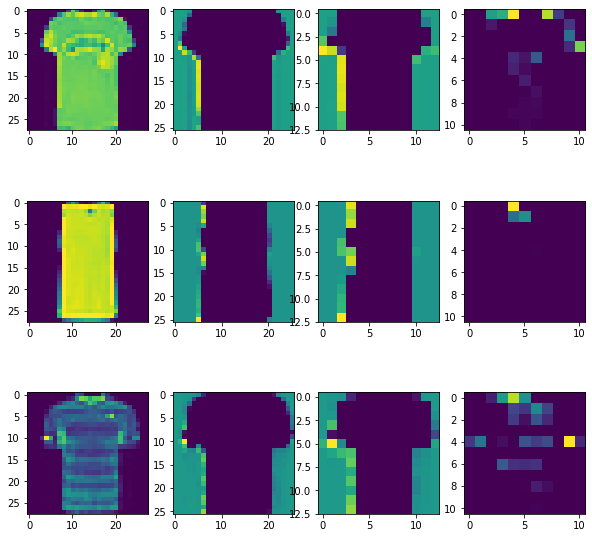

In [14]:
# Display CONVOLUTION = 1 (out of 64 possible convolutions)
CONVOLUTION = 1

# nrows = 3 (One for each image)
# ncols = 4 (One column for the input, 3 for visualizing a random convolution (aka filter) and pooling)
figure, axes = plt.subplots(nrows=3, ncols=4, figsize=(10,10))
for row, r_idx in zip(axes, range(0, 3)):
    for column, c_idx in zip(row, range(0, 4)):
        # Display the actual image
        if c_idx == 0:
            column.imshow(test_images_vcopy[tshirts[r_idx]])
        
        # Display CONVOLUTION = 1 learnt at the first Conv2D layer
        elif c_idx == 1:
            if r_idx == 0:
                column.imshow(prediction_1[0][0, : , : , CONVOLUTION])
            elif r_idx == 1:
                column.imshow(prediction_2[0][0, : , : , CONVOLUTION])
            else:
                column.imshow(prediction_3[0][0, : , : , CONVOLUTION])
        
        # Display MAX_POOLING effect
        elif c_idx == 2:
            if r_idx == 0:
                column.imshow(prediction_1[1][0, : , : , CONVOLUTION])
            elif r_idx == 1:
                column.imshow(prediction_2[1][0, : , : , CONVOLUTION])
            else:
                column.imshow(prediction_3[1][0, : , : , CONVOLUTION])
        
        # Display CONVOLUTION = 1 learnt at the second Conv2D layer
        elif c_idx == 3:
            if r_idx == 0:
                column.imshow(prediction_1[2][0, : , : , CONVOLUTION])
            elif r_idx == 1:
                column.imshow(prediction_2[2][0, : , : , CONVOLUTION])
            else:
                column.imshow(prediction_3[2][0, : , : , CONVOLUTION])

plt.show()

### Visualize Dress (Label 3)

In [15]:
# Dress is associated with Label 3 in the data set
dresses = group_3[3]

# Get the visualization model's prediction for each image
# Reshape is needed to convert (28, 28, 1) image to (1, 28, 28, 1)
# The first 1 indicates that we are sending in just 1 image for prediction
prediction_1 = model_for_visualization.predict(test_images[dresses[0]].reshape(1, 28, 28, 1))
prediction_2 = model_for_visualization.predict(test_images[dresses[1]].reshape(1, 28, 28, 1))
prediction_3 = model_for_visualization.predict(test_images[dresses[2]].reshape(1, 28, 28, 1))

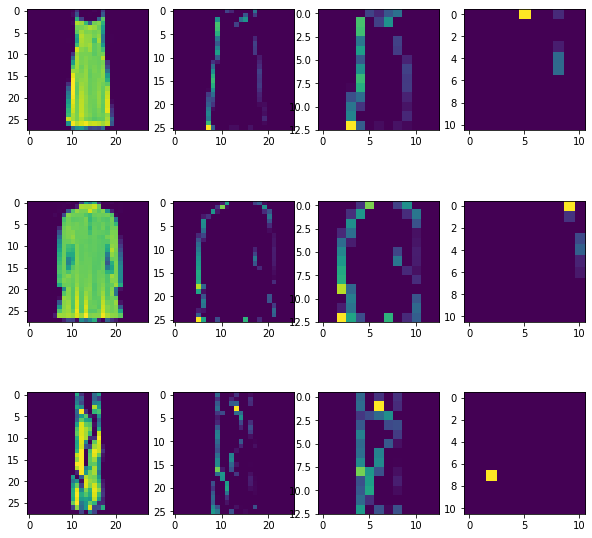

In [16]:
# Display CONVOLUTION = 2 (out of 64 possible convolutions)
CONVOLUTION = 2

# nrows = 3 (One for each image)
# ncols = 4 (One column for the input, 3 for visualizing a random convolution (aka filter) and pooling)
figure, axes = plt.subplots(nrows=3, ncols=4, figsize=(10,10))
for row, r_idx in zip(axes, range(0, 3)):
    for column, c_idx in zip(row, range(0, 4)):
        # Display the actual image
        if c_idx == 0:
            column.imshow(test_images_vcopy[dresses[r_idx]])
        
        # Display CONVOLUTION = 1 learnt at the first Conv2D layer
        elif c_idx == 1:
            if r_idx == 0:
                column.imshow(prediction_1[0][0, : , : , CONVOLUTION])
            elif r_idx == 1:
                column.imshow(prediction_2[0][0, : , : , CONVOLUTION])
            else:
                column.imshow(prediction_3[0][0, : , : , CONVOLUTION])
        
        # Display MAX_POOLING effect
        elif c_idx == 2:
            if r_idx == 0:
                column.imshow(prediction_1[1][0, : , : , CONVOLUTION])
            elif r_idx == 1:
                column.imshow(prediction_2[1][0, : , : , CONVOLUTION])
            else:
                column.imshow(prediction_3[1][0, : , : , CONVOLUTION])
        
        # Display CONVOLUTION = 1 learnt at the second Conv2D layer
        elif c_idx == 3:
            if r_idx == 0:
                column.imshow(prediction_1[2][0, : , : , CONVOLUTION])
            elif r_idx == 1:
                column.imshow(prediction_2[2][0, : , : , CONVOLUTION])
            else:
                column.imshow(prediction_3[2][0, : , : , CONVOLUTION])

plt.show()